## Table of Contents

1. [Problem Statement](#section1)<br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
2. [Load the Packages and Data](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Which type of cars are sold maximum?](#section401)<br/>
    - 4.2 [What is the co-relation between price and mileage?](#section402)<br/>
    - 4.3 [How many cars are registered?](#section403)<br/>
    - 4.4 [Price distribution between registered and non-registered cars.](#section404)<br/>
    - 4.5 [What is the car price distribution based on Engine Value?](#section405)<br/>
    - 4.6 [Which Engine Type of cars users preferred maximum?](#section406)<br/>
    - 4.7 [Establish corelation between all features using heatmap.](#section407)<br/>
    - 4.8 [Distribution of Price](#section408)<br/>    
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement ![CarSalesImage.png]

"This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. This is a subset of all car data in Ukraine. Using this We will analyze the various parameters of used car sales in Ukraine."
<a id=section101></a>
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "Car Sales"
- __Sponsoring Organization__: Don't know
- __Year__: 2019 
- __Description__: "This is a case study of more than 9.5K cars sale in Ukraine."  

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative.

<a id=section2></a> 
### 2. Load the packages and data

__Importing Packages__

In [3]:
import pandas as pd
a=[[1,2],[3,2]]
x=pd.DataFrame(a)
x

,0,1
0,1,2
1,3,2


In [4]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output 

__Loading Dataset__

In [5]:
CarSales_Data = pd.read_excel("Car_Sales.xlsx")
CarSales_Data.shape

(9576, 10)

<a id=section3></a>

## 3. Data Profiling

<a id=section301></a>

### 3.1 Understanding the Dataset

In [6]:
CarSales_Data                                                 # This will print the number of rows and comlumns of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


CarSales_Data has __9576 rows__ and __10 columns.__

In [7]:
CarSales_Data.columns  
# This will print the names of all columns.

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [9]:
CarSales_Data.head(2)
CarSales_Data.tail(2)

,car,price,body,mileage,engV,engType,registration,year,model,drive
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [10]:
CarSales_Data.describe() ## Understand Statistical Information

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [11]:
CarSales_Data.describe(include="object")

,car,body,engType,registration,model,drive
count,9576,9576,9576,9576,9576,9065
unique,87,6,4,2,863,3
top,Volkswagen,sedan,Petrol,yes,E-Class,front
freq,936,3646,4379,9015,199,5188


In [17]:
CarSales_Data.sort_values(by=['body','price'],ascending= [True,True])                               

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
92,Audi,0.0,crossover,0,3.0,Diesel,yes,2015,Q7,full
...,...,...,...,...,...,...,...,...,...,...
5862,Mercedes-Benz,107000.0,van,0,2.2,Diesel,yes,2016,V 250,full
8422,Ford,109000.0,van,0,3.2,Diesel,yes,2016,Transit ����.,rear
1788,Mercedes-Benz,109999.0,van,0,2.2,Diesel,yes,2016,V 250,full
8872,Mercedes-Benz,169000.0,van,1,3.0,Diesel,yes,2014,Sprinter 319 ����.,full


<AxesSubplot:>

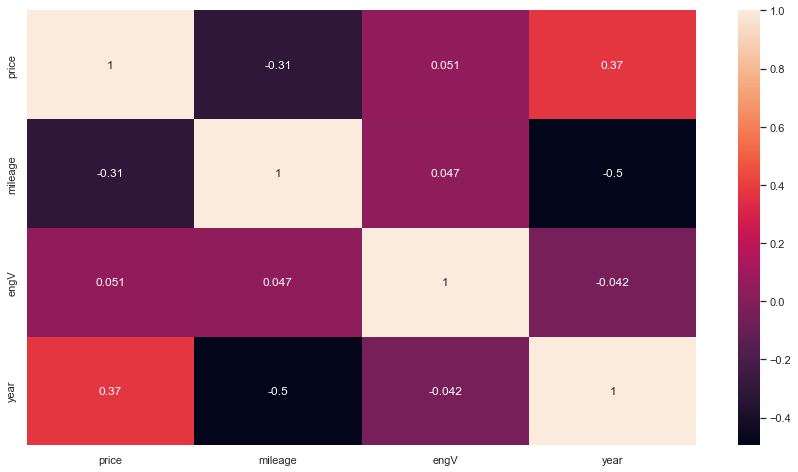

In [22]:
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
plt.subplots(figsize=(15,8))
sns.heatmap(CarSales_Data.corr(),annot=True)

In [23]:
CarSales_Data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [24]:
CarSales_Data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From the above output we can see that __engV__ and __drive__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>

1. Fill missing
2.Sort()according to price (Asending)
3. Group via drive 
4. Dummy

Now performing __pandas profiling__ to understand data better.

In [26]:
profile = pandas_profiling.ProfileReport(CarSales_Data)
profile.to_file(output_file="CarSales_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a id=section303></a>

### 3.3 Preprocessing

- Dealing with duplicate rows<br/>
    - Find number of duplicate rows in the dataset.
    - Print the duplicate entries and analyze.
    - Drop the duplicate entries from the dataset.

In [ ]:
b=CarSales_Data["drive"].mode()


In [ ]:
CarSales_Data["drive"]=CarSales_Data["drive"].fillna("front")
CarSales_Data.isnull().sum()

In [ ]:
print(CarSales_Data.duplicated().sum())

In [ ]:
CarSales_Data.loc[CarSales_Data.duplicated(keep=False), :]

In [ ]:
CarSales_Data.drop_duplicates(keep='first').shape

Duplicate entries are removed now.

- Dealing with missing values<br/>
    - __434__ missing entries of __engV.__ Replace it with __median__ value of engV from the same Car and body group of cars.
    - __511__ missing entries of __drive.__ Replace it with __most common__ value of drive from the same Car and body group of cars.
    - Drop entries having __price__ is 0 or less than 0.

In [ ]:
CarSales_Data['engV'] = CarSales_Data.groupby(['car', 'body'])['engV'].transform(lambda x: x.fillna(x.median()))


Now let's check if the missing values of __engV__ has been replaced.

In [ ]:
CarSales_Data.isnull().sum()

__424__ missing values of __engV__ has been replaced however, still __10__ entries are left as missing. Let's see the missing value data.

In [ ]:
CarSales_Data[CarSales_Data.engV.isnull()]

Replacing NaN values of __drive__ with most common values of drive from Car and body group.

In [ ]:
def f(x):
    if x.count()<=0:
        return np.nan
    return x.value_counts().index[0]

CarSales_Data['drive'] = CarSales_Data['drive'].fillna(CarSales_Data.groupby(['car','body'])['drive'].transform(f))
#CarSales_Data[CarSales_Data.drive.isnull()]

Let's check the count of NaN values of __engV__ and __drive__.

In [ ]:
CarSales_Data.isnull().sum()

Dropping remaining NaN values of __engV__ and __drive__.

In [ ]:
CarSales_Data.dropna(subset=['engV'],inplace=True)
CarSales_Data.dropna(subset=['drive'],inplace=True)
CarSales_Data.isnull().sum()

Dropping entries with __price <= 0__ .

In [ ]:
CarSales_Data = CarSales_Data.drop(CarSales_Data[CarSales_Data.price <= 0 ].index)

In [ ]:
CarSales_Data.price[CarSales_Data.price ==0].count()

In [ ]:
b=CarSales_Data["mileage"].median()
CarSales_Data["mileage"]=CarSales_Data["mileage"].replace(0,b)

In [ ]:
CarSales_Data[CarSales_Data.mileage == 0]

<a id=section304></a>

The data are processed now. The dataset doesnot contain missing and zero values. The pandas profiling report generated after processing the data giving us more clear data. We can compare the two reports.

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Which type of cars are sold maximum?

- Using Countplot

In [ ]:
sns.countplot(x='body', data=CarSales_Data).set_title('Count plot for car variants.')

You can see __sedan__ cars are sold maximum and followed that __crossover,hatch,van,other and vagon__

<a id=section402></a>

### 4.2 What is the co-relation between price and mileage?

In [ ]:
sns.regplot(x='mileage',y='price',data=CarSales_Data)

You can see there are some outliers here. Excluding those,it seems that majority of car price is below 150000 and gives mileage in the range of 0 to 400.

<a id=section403></a>

### 4.3. How many cars are registered?

In [ ]:
sns.countplot(CarSales_Data['registration'])

8000+ cars are registered and very few are not registered

<a id=section404></a>

### 4.4. Price distribution between registered and non-registered cars.

In [ ]:
sns.boxplot(x='registration',y='price',data=CarSales_Data)

Majority of the cars are registered and the price of those cars are below 300000. Non-registered cars are cheaper in cost.

<a id=section405></a>

### 4.5. What is the car price distribution based on Engine Value?

In [ ]:
sns.regplot(x='engV',y='price',data=CarSales_Data)

Except few outliers, it is clearly observed that the range of car price is between 0 to 150000 having the range of engine value between 0 to 6. 

<a id=section406></a>

### 4.6. Which engine type of cars users preferred maximum?

In [ ]:
sns.countplot(CarSales_Data['engType'])

Petrol cars are more preferred and followed by Diesel, Gas and others.

<a id=section407></a>

### 4.7 Establish coorelation between all the features using heatmap.

In [ ]:
corr = CarSales_Data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __mileage and engV are negatively corelated with year.__
- __mileage is also negatively corelated with year.__
- __engV is positively coorelated with mileage and price.__
- Positive corelation observed between year and price too.

<a id=section408></a>

### 4.8 Distribution of price.

In [ ]:
sns.distplot(CarSales_Data['price'],color ='g')
plt.title('Distribution of price')
plt.show()

The __'price'__ mostly varies between __0 and 80000.__

<a id=section5></a>

### 5 Conclusion

- Sedan cars sold maximum.
- Price is increasing as the engine value is increasing.
- The price and mileage goes down as engine values decreasing.